In [1]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

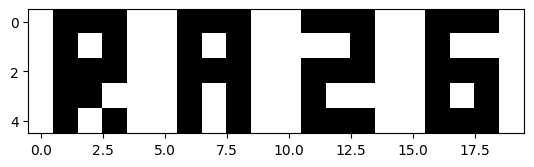

In [2]:
#Task 1

Letter_S = np.array([
    [255, 200, 200, 200, 255, 255, 200, 200, 200, 255, 255, 200, 200, 200, 255, 255, 200, 200, 200, 255],
    [255, 200, 255, 200, 255, 255, 200, 255, 200, 255, 255, 255, 255, 200, 255, 255, 200, 255, 255, 255],
    [255, 200, 200, 200, 255, 255, 200, 200, 200, 255, 255, 200, 200, 200, 255, 255, 200, 200, 200, 255],
    [255, 200, 200, 255, 255, 255, 200, 255, 200, 255, 255, 200, 255, 255, 255, 255, 200, 255, 200, 255],
    [255, 200, 255, 200, 255, 255, 200, 255, 200, 255, 255, 200, 200, 200, 255, 255, 200, 200, 200, 255]
])

plt.imshow(Letter_S,cmap='gray')

In [3]:
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/22101326_Md Rakibul Hasan_Lab1/Task_2/Dataset'
print(os.listdir(folder_path))

Mounted at /content/drive
['pexels-lilartsy-1624076.jpg', 'pexels-pixabay-36753.jpg', 'pexels-pixabay-53135.jpg', 'pexels-hieu-1179863.jpg', 'pexels-pixabay-63609.jpg', 'pexels-dropshado-7484064.jpg', 'pexels-inspiredimages-133181.jpg', 'pexels-alancabello-1477350.jpg', 'pexels-ithalu-921703.jpg', 'pexels-katlovessteve-548381.jpg']


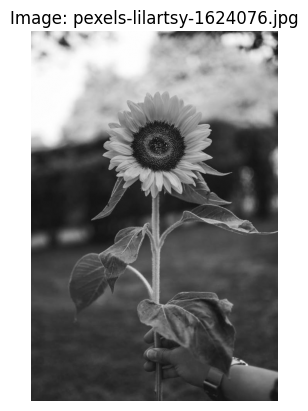

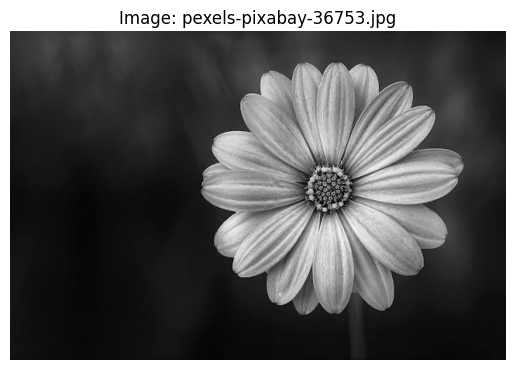

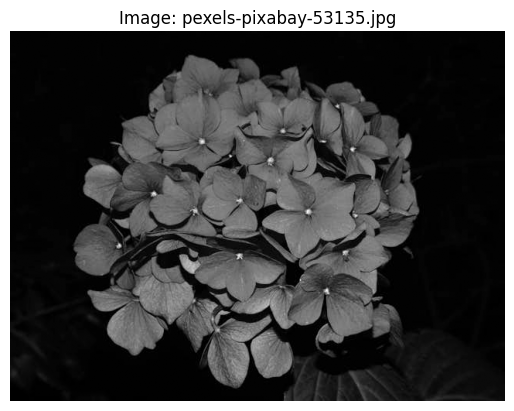

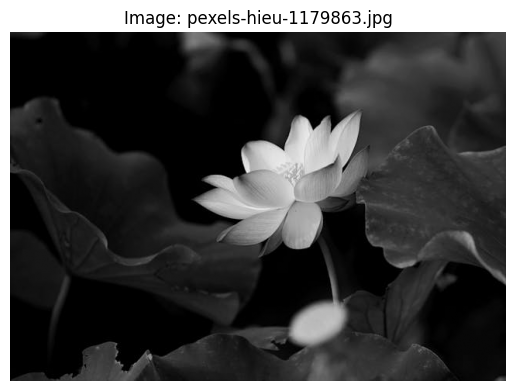

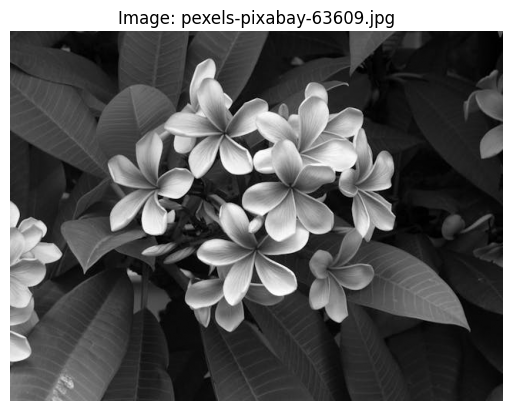

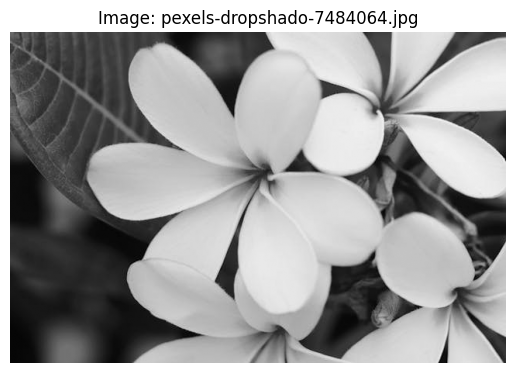

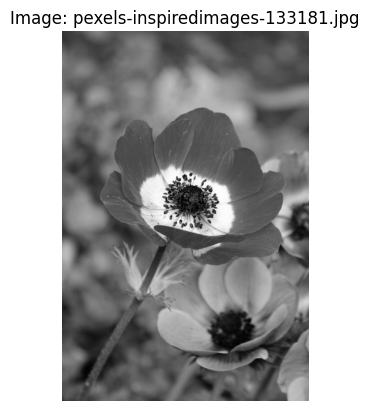

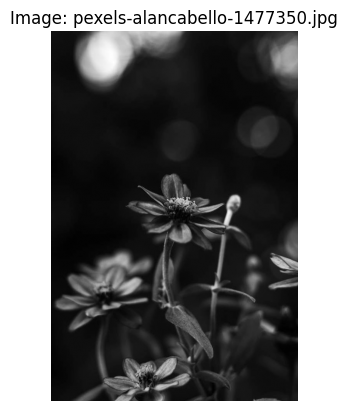

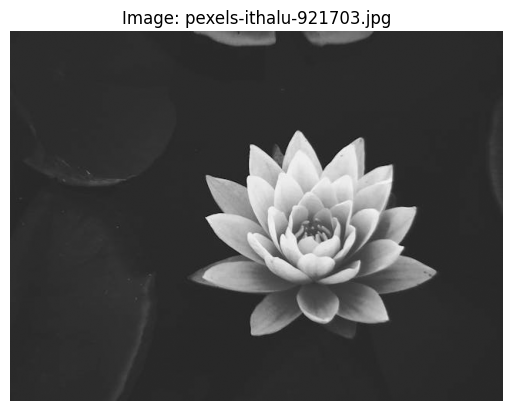

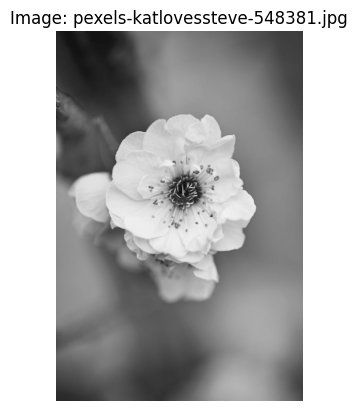

In [4]:
for image in os.listdir(folder_path):
    image_path = os.path.join(folder_path, image)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        plt.imshow(img, cmap='gray')
        plt.title(f'Image: {image}')
        plt.axis('off')
        plt.show()

In [5]:
#TASK_2(5 different transformation)

for image in os.listdir(folder_path):
    img_path = os.path.join(folder_path, image)
    img = cv2.imread(img_path)
    if img is not None:
      # Cropping an image
      cropped_image = img[100:243, 100:277]
      print(cropped_image.shape)
      plt.imshow(cv2.cvtColor(cropped_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
      plt.title('Cropped Image')
      plt.show()

      #Flip an image
      flipped_image = cv2.flip(img, -1)  # 1 for horizontal flip, 0 for vertical, -1 for both
      plt.imshow(cv2.cvtColor(flipped_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
      plt.title('Flipped Image')
      plt.show()

      #Resize an image
      width = int(img.shape[1] * 0.5)
      height = int(img.shape[0] * 0.5)
      dim = (width, height)
      resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      plt.imshow(cv2.cvtColor(resized_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
      plt.title('Resized Image')
      plt.show()

      #Shearing an image
      # Get image dimensions
      height, width = img.shape[:2]
      # Define shear factor
      shear_x = 0.5  # Shear along the x-axis
      shear_y = 0.0  # No shear along the y-axis
      # Create the affine transformation matrix for shear
      shear_matrix = np.float32([
          [1, shear_x, 0],  # Shear along the x-axis
          [shear_y, 1, 0]   # No shear along the y-axis
      ])
      # Apply the shear transformation
      sheared_image = cv2.warpAffine(img, shear_matrix, (width + int(shear_x * height), height))
      plt.imshow(cv2.cvtColor(sheared_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
      plt.title('Sheared Image')
      plt.show()


      #Stretch an image
      # Get image dimensions
      height, width = img.shape[:2]
      # Define stretch factors
      stretch_x = 2  # Stretch along the x-axis (1.5 times the original width)
      stretch_y = 1.0 # No stretch along the y-axis (1.0 keeps the original height)
      # Create the affine transformation matrix for stretch
      stretch_matrix = np.float32([
          [stretch_x, 0, 0],
          [0, stretch_y, 0]
      ])
      # Apply the stretch transformation
      stretched_image = cv2.warpAffine(img, stretch_matrix, (int(width * stretch_x), int(height * stretch_y)))
      # Display the result
      plt.imshow(cv2.cvtColor(stretched_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
      plt.title('Stretched Image')
      plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [6]:
#TASK2(Random noise and Histogoram)

save_path = '/content/drive/MyDrive/22101326_Md Rakibul Hasan_Lab1/Task_2/Noisy image'
os.makedirs(save_path, exist_ok=True)
all_noisy_pixels = []
for image in os.listdir(folder_path):
    img_path = os.path.join(folder_path, image)
    img = cv2.imread(img_path)
    if img is not None:
      # Parameters for salt-and-pepper noise
      prob = 0.03  # Probability of noise (0.03 means 3% of the pixels will be noisy)

      # Generate random noise
      noisy_img = np.copy(img)
      num_salt = np.ceil(prob * img.size * 1).astype(int)  # Number of 'salt' pixels
      num_pepper = np.ceil(prob * img.size * 1).astype(int)  # Number of 'pepper' pixels

      # Apply 'salt' noise (white pixels)
      coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
      noisy_img[coords[0], coords[1]] = 255

      # Apply 'pepper' noise (black pixels)
      coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
      noisy_img[coords[0], coords[1]] = 0

      #save the noisy image
      save_filename = os.path.join(save_path, f"noisy_{image}")
      cv2.imwrite(save_filename, noisy_img)

      all_noisy_pixels.extend(noisy_img.flatten())

      # Display the original and noisy imgs
      plt.figure(figsize=(10, 5))
      plt.subplot(1, 2, 1)
      plt.title("Original image")
      plt.imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))

      plt.subplot(1, 2, 2)
      plt.title("image with Salt-and-Pepper Noise")
      plt.imshow(cv2.cvtColor(noisy_img.astype(np.uint8), cv2.COLOR_BGR2RGB))

      plt.show()
print()
plt.figure(figsize=(8, 5))
plt.hist(all_noisy_pixels, bins=50, color='gray', alpha=0.7)
plt.title('Histogram of Noisy_images (10 images)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

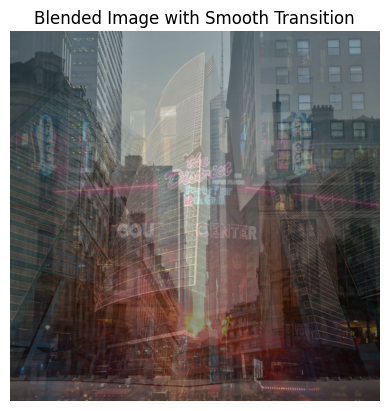

In [7]:
#Task_3 (blended image with smooth transition)
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

folder_path_2 = '/content/drive/MyDrive/22101326_Md Rakibul Hasan_Lab1/Task_3/Dataset'
width, height = 1000, 1000
dim = (width, height)
result = 0
images = []
weights = []

# Load and resize all images
for image in os.listdir(folder_path_2):
    img_path = os.path.join(folder_path_2, image)
    img = cv2.imread(img_path)
    if img is not None:
        resized_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
        images.append(resized_img)
        weights.append(np.random.rand())  # random weight for blending

# Normalize weights to sum to 1
weights = np.array(weights)
weights /= weights.sum()

# Blend images with normalized weights
for i in range(len(images)):
  result += weights [i]*images[i]

# # Convert to uint8
result = result.astype('uint8')
# Show the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Blended Image with Smooth Transition")
plt.axis('off')
plt.show()

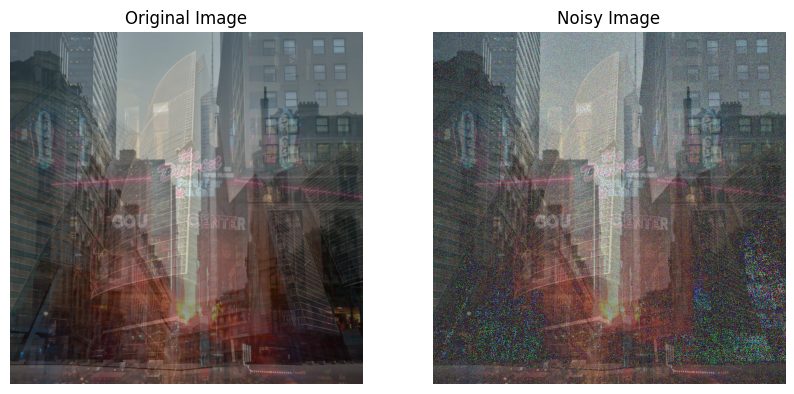

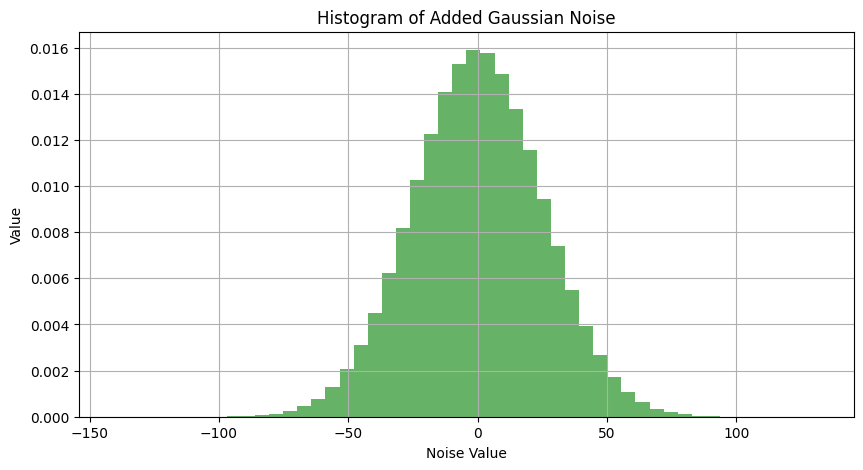

In [8]:
# Generate Gaussian noise with the same size as the image
mean = 0
std_dev = 25
noise = np.random.normal(mean, std_dev, result.shape)

# Add the noise to the image
output = result + noise

# Display the original and noisy images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
print()
print()
flattened_noise = noise.flatten()

# Plot histogram of the added Gaussian noise
plt.figure(figsize=(10, 5))
plt.hist(flattened_noise, bins=50, density=True, alpha=0.6, color='g')
plt.title('Histogram of Added Gaussian Noise')
plt.xlabel('Noise Value')
plt.ylabel('Value')
plt.grid(True)
plt.show()